In [1]:
from utils import read_data
import numpy as np
import pickle as pkl
from tqdm import tqdm
import pandas as pd
import random
import matplotlib.pyplot as plt
from models import AD1

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-04-08 23:59:15.572553: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
colors ={'u':"#00c2f2",
         'g':"#59b359",
         'r':"#e51f00",
         'i':"#502db3",
         'z':"#ffaa00",
         'y':"#f2b6de"
        }

classes = ['Cepheid',
           'AGN',
           'RRL',
           'EB',
           'Mdwarf',
           'uLens-Single',
           'uLens-Binary',
           'CART',
           'SNIa',
           'SNIb',
           'SNIc',
           'd-Sct']

In [3]:
# read the first 20 data points of the lightcurves in each of gri bands

data, label = read_data(n_points = 20)

1it [00:07,  7.57s/it]

Cepheid 3219 []
Cepheid 3219 []
Cepheid 3219 []
Cepheid 4263 []
Cepheid 4263 []
Cepheid 4263 []


12it [01:02,  5.25s/it]


In [4]:
#split into train and test sets

random.seed(10)
data_size = len(label)
shuffler = np.random.permutation(len(label))
data = np.asarray(data)[shuffler]
train_fract = 0.9
train_size = int(train_fract*data_size)
train_set = data[:train_size]
train_label = np.asarray(label)[:train_size]

test_set = data[train_size:]
test_label = np.asarray(label)[train_size:]

Text(0, 0.5, 'Flux')

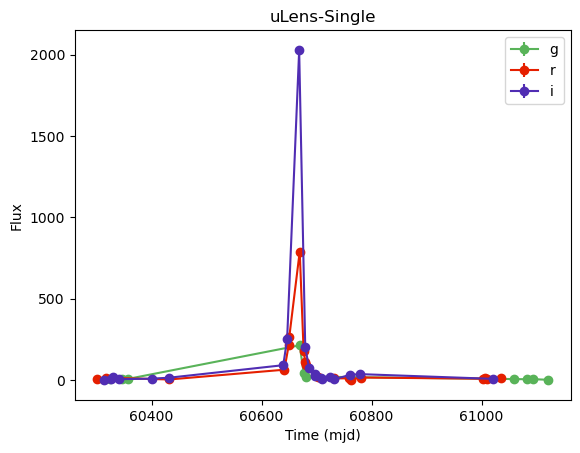

In [8]:
# Read an example light curve

class_ind = 5
ind = 6

f = train_set[train_label == class_ind][ind]
# print(f[:,0])


for b, band in enumerate(['g', 'r', 'i']):    

    plt.errorbar(f[:,3*b],
                 f[:,3*b+1],
                 yerr = f[:,3*b+2],
                 fmt = 'o-',
                 color = colors[band],
                 label = band)
    
plt.legend()
plt.title(classes[class_ind])
plt.xlabel('Time (mjd)')
plt.ylabel('Flux')

In [10]:
model = AD1()
opt = tf.keras.optimizers.Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
# Training parameters
batch_size = 16 # number of events per epoch
num_epochs = 5000 # number of epochs
validation_split = 0.2 # fraction of the training set that is for validation only

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.00001,
                                              patience=5)
history = model.fit(train_set, train_set, 
                    batch_size=batch_size, 
                    epochs=num_epochs, 
                    validation_split=validation_split, 
                    verbose=True)